<a href="https://colab.research.google.com/github/alteush/Deep-Learning-2024/blob/main/Credit_Card_Deep_Learning_Project_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
import sys
your_drive_path_to_src_file = "/content/drive/MyDrive/Statistics Masters/Adv. computational learning and data analysis/Project/Data/"
sys.path.append(your_drive_path_to_src_file)

In [5]:
# original path
# df = pd.read_csv("CSV/creditcard.csv")
df = pd.read_csv("/content/drive/MyDrive/Statistics Masters/Adv. computational learning and data analysis/Project/Data/creditcard.csv")

In [6]:
df.shape

(284807, 31)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
# class = 1 --> Fraud
#class = 0 --> Not Fraud

#Gives count of positive and negative labels
np.bincount(df['Class'])

array([284315,    492])

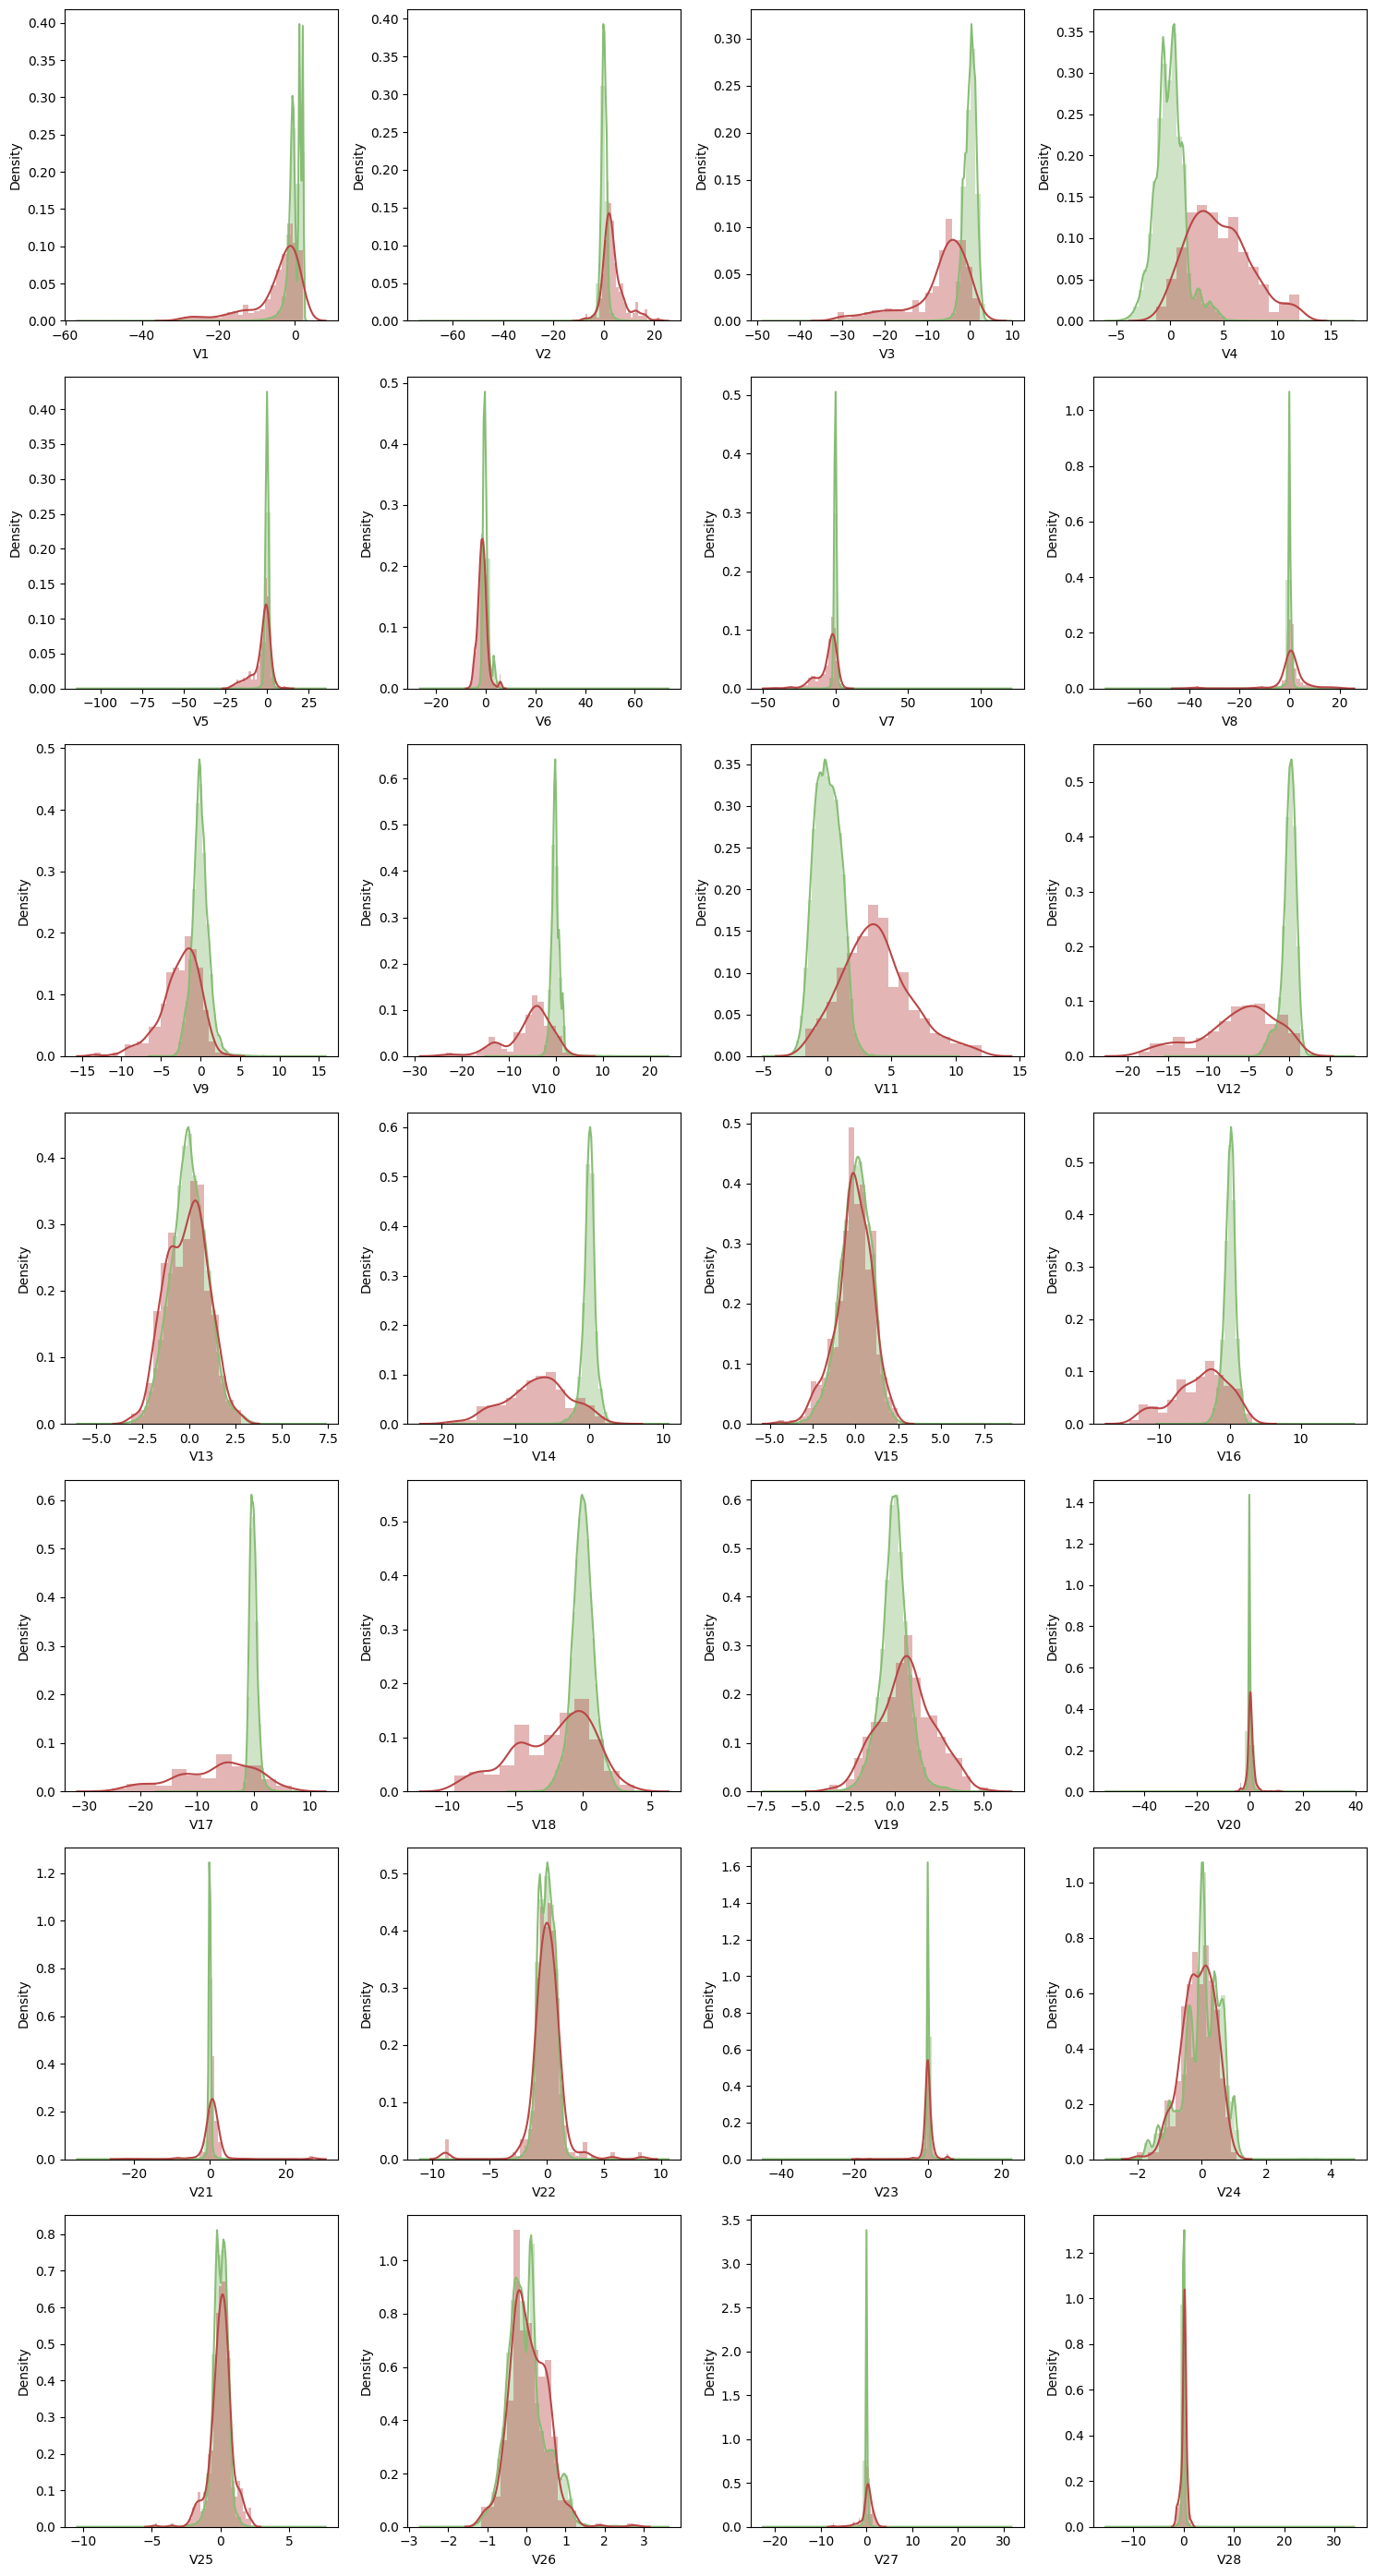

In [11]:
cols = df.columns.drop(['Time', 'Amount', 'Class'])

f, ax = plt.subplots(7, 4, figsize = (15, 28))

for i, c in zip(ax.flatten(), cols):
    sns.distplot(df[c][df['Class'] == 0], color = '#87bd75', ax = i)
    sns.distplot(df[c][df['Class'] == 1], color = '#b94646', ax = i)
f.tight_layout()

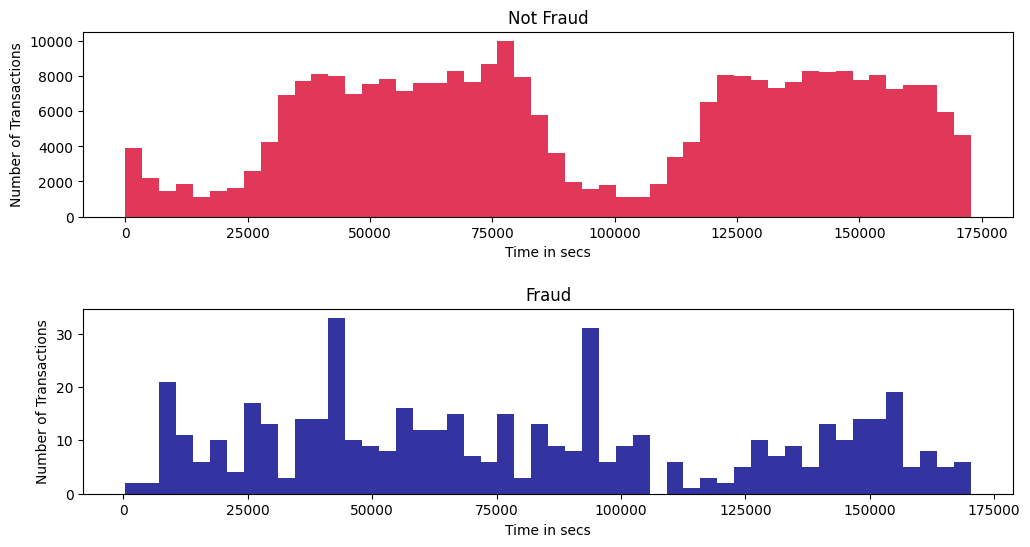

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Time'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)

ax1.set_xlabel('Time in secs')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Time"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)

ax2.set_xlabel('Time in secs')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

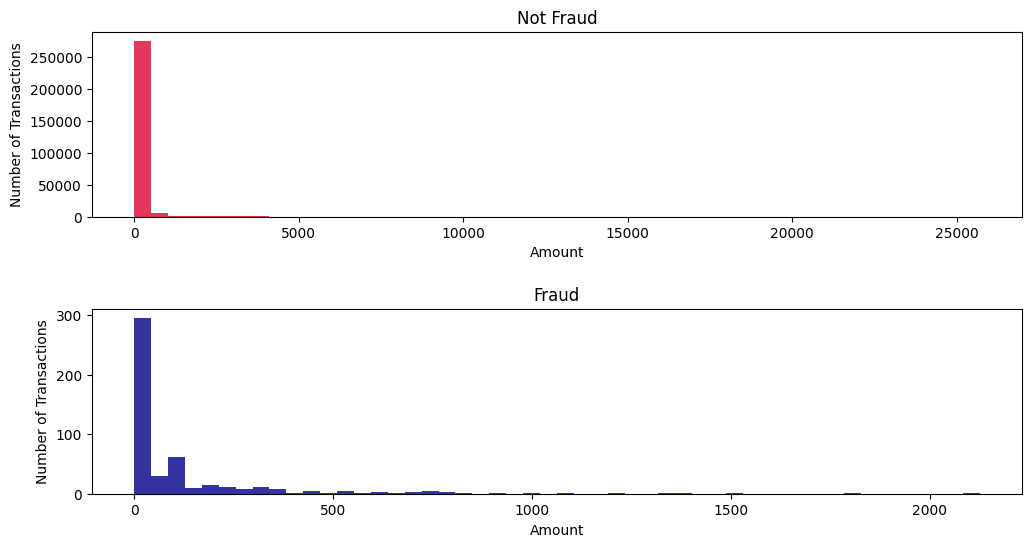

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Amount'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)
ax1.set_xlabel('Amount')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Amount"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)
ax2.set_xlabel('Amount')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

In [14]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [15]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [16]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

In [18]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [19]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(y_valid) * 100))

Percentage of FRAUD instances in Training Set : 0.17281485220215498
Percentage of FRAUD instances in Testing Set : 0.17204452090867595
Percentage of FRAUD instances in Validation set : 0.1733634707805745


In [20]:
X_train.shape

(182276, 29)

### Oversampling

In [21]:
def oversampling(X_train, y_train):
# Oversampling the imbalanced dataset
    oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
    X, y = oversample.fit_resample(X_train, y_train)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X, y
    # scatter plot of examples by class label


In [22]:
X_train, y_train = oversampling(X_train, y_train)

Counter({0: 181961, 1: 72784})


Now, it's fairly balanced data

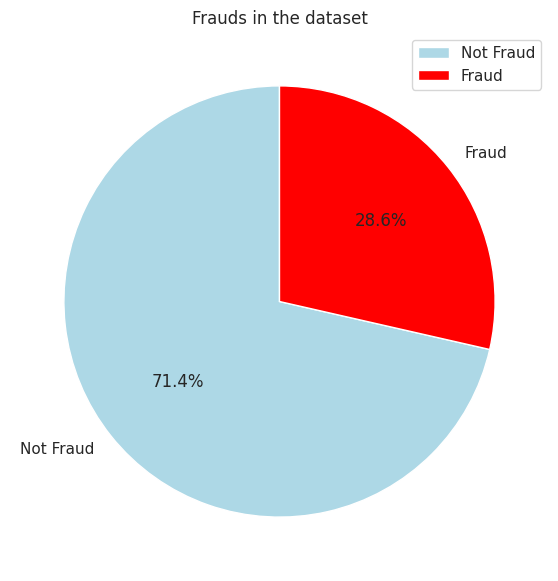

In [23]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = y_train.value_counts()

colors = ["lightblue","red"]


plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

### Adding Gaussian Noise

In [24]:
#Adding Gaussian Noise

def add_noise(X_train):
    mean = 0
    sigma = 0.1
    noise = np.random.normal(mean, sigma ,X_train.shape)
    X_train = X_train + noise
    return X_train

In [25]:
X_train_noised = add_noise(X_train)

In [26]:
y_train = np.array(y_train).reshape(-1, 1)
y_valid = np.array(y_valid).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [27]:
#from keras.utils import np_utils

#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#y_valid = np_utils.to_categorical(y_valid)

# Instead of:
# from keras.utils import np_utils
# y_train = np_utils.to_categorical(y_train)

# Use:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_valid = keras.utils.to_categorical(y_valid)

### Autoencoder Model

In [28]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [29]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')


history = autoencoder.fit(X_train_noised, X_train_noised,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_valid, X_valid),
                    verbose=1).history

Epoch 1/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5351 - loss: 6.9654 - val_accuracy: 0.6184 - val_loss: 0.7617
Epoch 2/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7131 - loss: 6.8733 - val_accuracy: 0.4926 - val_loss: 0.8339
Epoch 3/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7258 - loss: 6.7835 - val_accuracy: 0.6854 - val_loss: 0.7305
Epoch 4/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7563 - loss: 6.8009 - val_accuracy: 0.6614 - val_loss: 0.7479
Epoch 5/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7432 - loss: 6.7496 - val_accuracy: 0.6940 - val_loss: 0.7316
Epoch 6/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7634 - loss: 6.7691 - val_accuracy: 0.6983 - val_loss: 0.7308
Epoch 7/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7687 - loss: 6.7957 - val_accuracy: 0.6981 - val_loss: 0.7314
Epoch 8/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7716 - loss: 6.75

In [30]:
denoised_data = autoencoder.predict(X_train_noised)

7961/7961 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


# Fraud Detector Model (Baseline)

In [31]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [32]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(denoised_data, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8808 - loss: 0.4496 - val_accuracy: 0.9397 - val_loss: 0.2026
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9550 - loss: 0.1413 - val_accuracy: 0.9435 - val_loss: 0.1892
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9570 - loss: 0.1289 - val_accuracy: 0.9445 - val_loss: 0.1855
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9585 - loss: 0.1215 - val_accuracy: 0.9425 - val_loss: 0.1832
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1127 - val_accuracy: 0.9291 - val_loss: 0.2124
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9620 - loss: 0.1065 - val_accuracy: 0.9344 - val_loss: 0.1951
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9651 - loss: 0.0981 - val_accuracy: 0.9282 - val_loss: 0.2057
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9678 - loss: 0.0895 - val_accuracy: 0.

## Model Evaluation

In [33]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [34]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9426 - loss: 0.1670


[0.1667937934398651, 0.9420139789581299]

In [35]:
baseline_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


#### ROC-AUC Curve

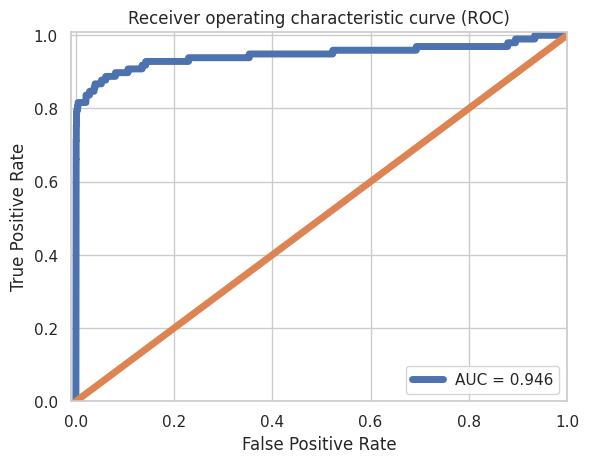

In [36]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), baseline_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [37]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), baseline_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  87.75510204081633 %


#### PR-AUC Curve

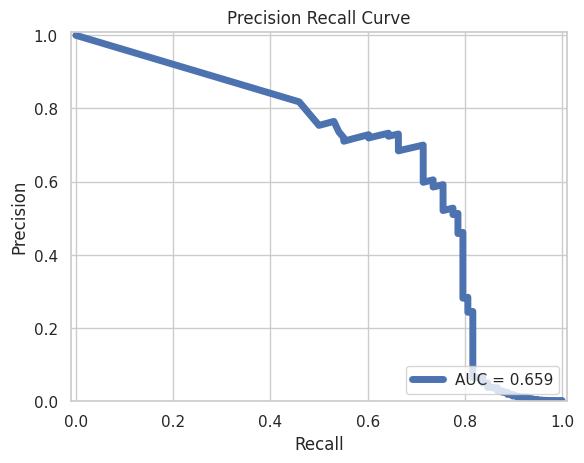

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), baseline_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Measuring the Effect of Denoising Autoencoder

In this section we will train the model on X_train, instead of denoised_data, and see the difference in perforemance between the models

In [39]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [40]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9699 - loss: 0.1192 - val_accuracy: 0.9908 - val_loss: 0.0256
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9904 - loss: 0.0282 - val_accuracy: 0.9925 - val_loss: 0.0221
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9938 - loss: 0.0204 - val_accuracy: 0.9951 - val_loss: 0.0155
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9947 - val_loss: 0.0165
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9963 - loss: 0.0134 - val_accuracy: 0.9957 - val_loss: 0.0135
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.9976 - val_loss: 0.0097
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0100 - val_accuracy: 0.9975 - val_loss: 0.0097
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0098 - val_accuracy: 0.

In [41]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [42]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9988 - loss: 0.0076


[0.00709677254781127, 0.9988237619400024]

In [43]:
no_noise_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


## Model Evaluation

#### ROC-AUC Curve

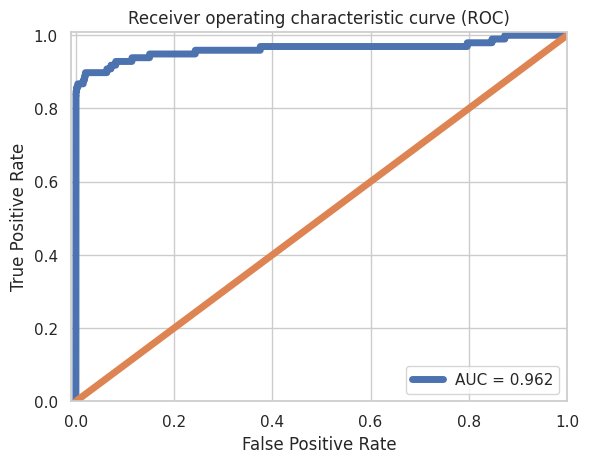

In [44]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), no_noise_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [45]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), no_noise_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  84.6938775510204 %


#### PR-AUC Curve

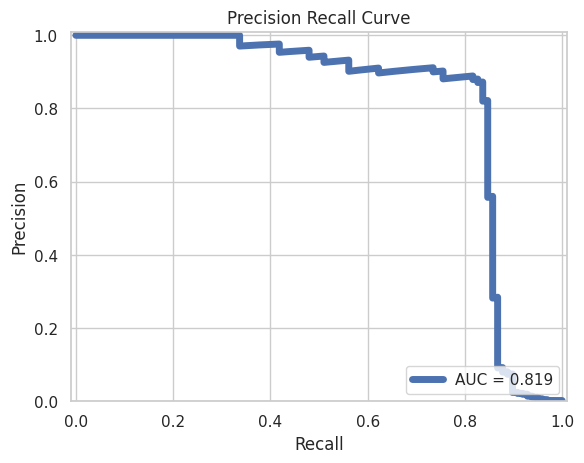

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), no_noise_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Applying PR AUC instead of Accuracy

The PR AUC was calculated with code taken from here:

https://www.kaggle.com/code/nyk510/using-pr-auc-metrics-in-keras

In [47]:
from tensorflow.keras.metrics import AUC
pr_metric = AUC(curve='PR', num_thresholds=1000) # The higher the threshold value, the more accurate it is calculated.

import tensorflow as tf
from sklearn.metrics import average_precision_score

def sk_pr_auc(y_true, y_pred):
    return tf.py_function(average_precision_score, (y_true, y_pred), tf.float64)

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[
                  pr_metric,
                  sk_pr_auc
              ])

In [48]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [49]:
fraud_dtr.compile(metrics=[pr_metric],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc: 0.9594 - loss: 0.2839 - val_auc: 0.9986 - val_loss: 0.0503
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9942 - loss: 0.0940 - val_auc: 0.9990 - val_loss: 0.0384
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9962 - loss: 0.0765 - val_auc: 0.9991 - val_loss: 0.0358
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9972 - loss: 0.0650 - val_auc: 0.9993 - val_loss: 0.0298
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9981 - loss: 0.0547 - val_auc: 0.9992 - val_loss: 0.0324
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - auc: 0.9986 - loss: 0.0467 - val_auc: 0.9995 - val_loss: 0.0226
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9990 - loss: 0.0390 - val_auc: 0.9994 - val_loss: 0.0237
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9993 - loss: 0.0333 - val_auc: 0.9995 - val_loss: 0.0187
Epoch 9/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - au

## Model Evaluation

In [50]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [51]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - auc: 0.9997 - loss: 0.0049


[0.004648256581276655, 0.9997110366821289]

In [52]:
pr_auc_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


#### ROC-AUC Curve

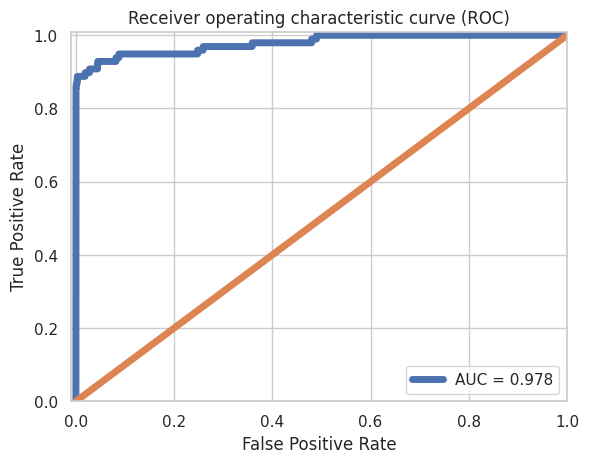

In [53]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), pr_auc_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [54]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), pr_auc_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  85.71428571428571 %


#### PR-AUC Curve

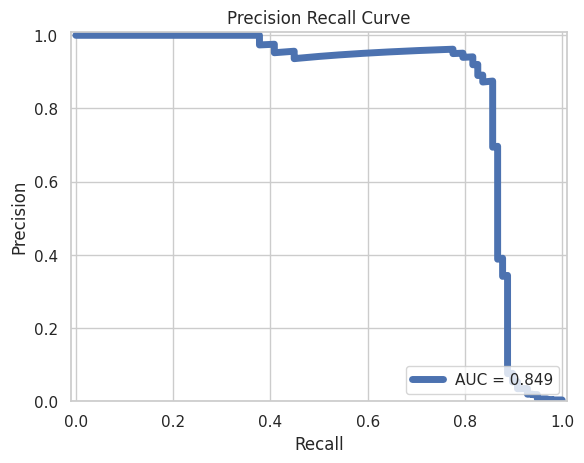

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), pr_auc_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Improved Fraud detector

In [56]:
from tensorflow.keras import regularizers

input_layer = keras.layers.Input(shape=(input_shape,))
layer_1 = keras.layers.Dense(128, activation="relu",
                             kernel_initializer='he_normal')(input_layer)
drop_1 = keras.layers.Dropout(0.2)(layer_1)

layer_2 = keras.layers.Dense(64, activation="relu",
                             kernel_initializer='he_normal')(drop_1)
drop_2 = keras.layers.Dropout(0.2)(layer_2)

layer_3 = keras.layers.Dense(32, activation='relu',
                             kernel_initializer='he_normal')(drop_2)
layer_4 = keras.layers.Dense(16, activation='relu',
                             kernel_initializer='he_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation='sigmoid')(layer_4)

fraud_dtr = keras.Model(inputs=input_layer, outputs=output_layer)


In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

fraud_dtr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = fraud_dtr.fit(X_train_noised, y_train, epochs=25, batch_size=256,
              validation_split=0.2, callbacks=[early_stop, reduce_lr],validation_data = (X_valid, y_valid)).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9176 - loss: 0.1830 - val_accuracy: 0.9925 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0285 - val_accuracy: 0.9972 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9982 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9976 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9986 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9984 - val_loss: 0.0098 - learning_rate: 5.0000e-04


In [58]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9978 - val_loss: 0.0095
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9978 - val_loss: 0.0098
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9978 - val_loss: 0.0096
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9978 - val_loss: 0.0097
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9979 - val_loss: 0.0096
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9979 - val_loss: 0.0098
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.

In [59]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [60]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9982 - loss: 0.0069


[0.006972260773181915, 0.9980688691139221]

In [61]:
trans_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


## Model Evaluation

#### ROC-AUC Curve

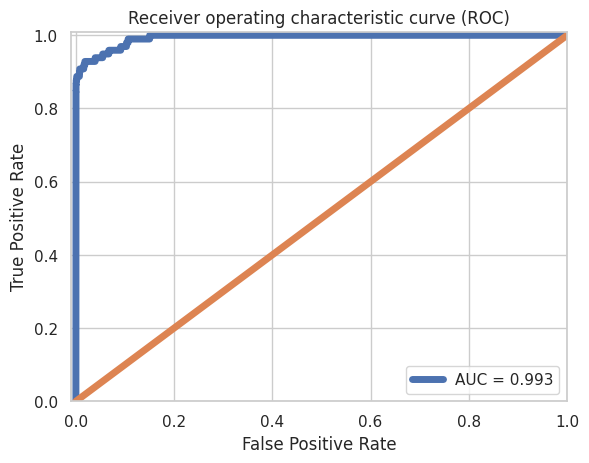

In [62]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), trans_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [63]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), trans_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  87.75510204081633 %


#### PR-AUC Curve

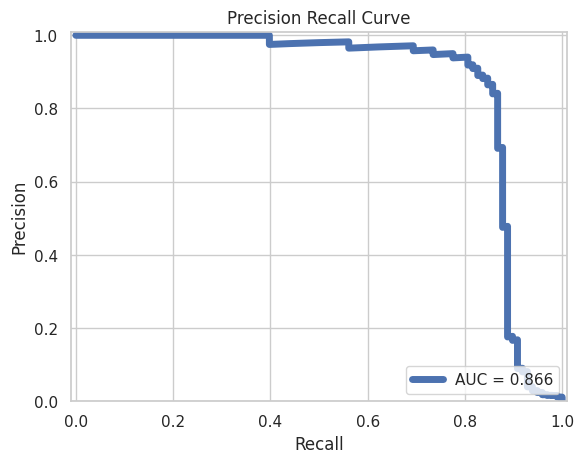

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), trans_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# All Models Put Together

## PR AUC

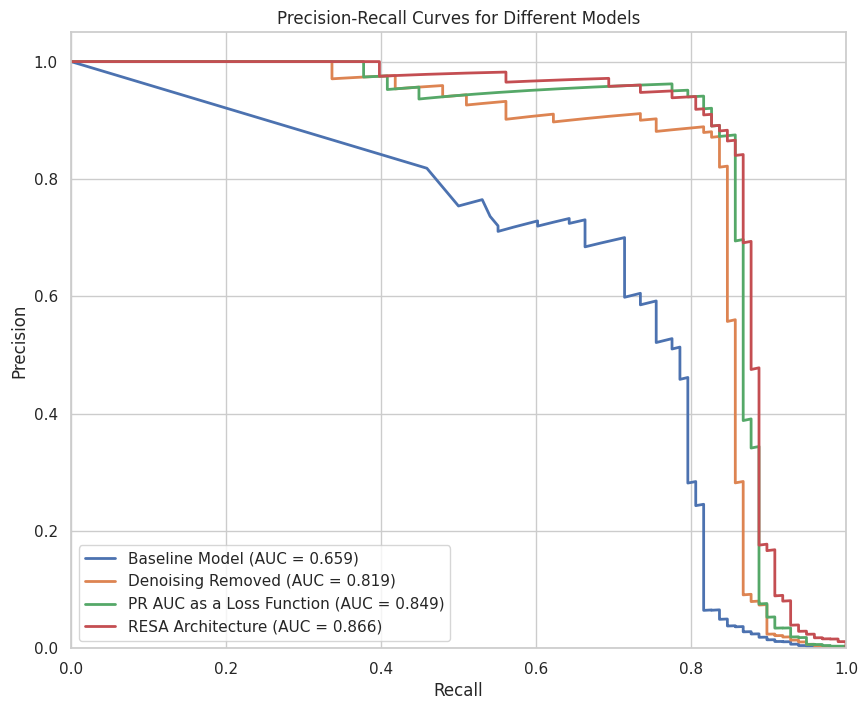

In [65]:
models = {
    'Baseline Model': baseline_preds,
    'Denoising Removed': no_noise_preds,
    'PR AUC as a Loss Function': pr_auc_preds,
    'RESA Architecture': trans_preds
}


plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis=1), predictions[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## ROC AUC

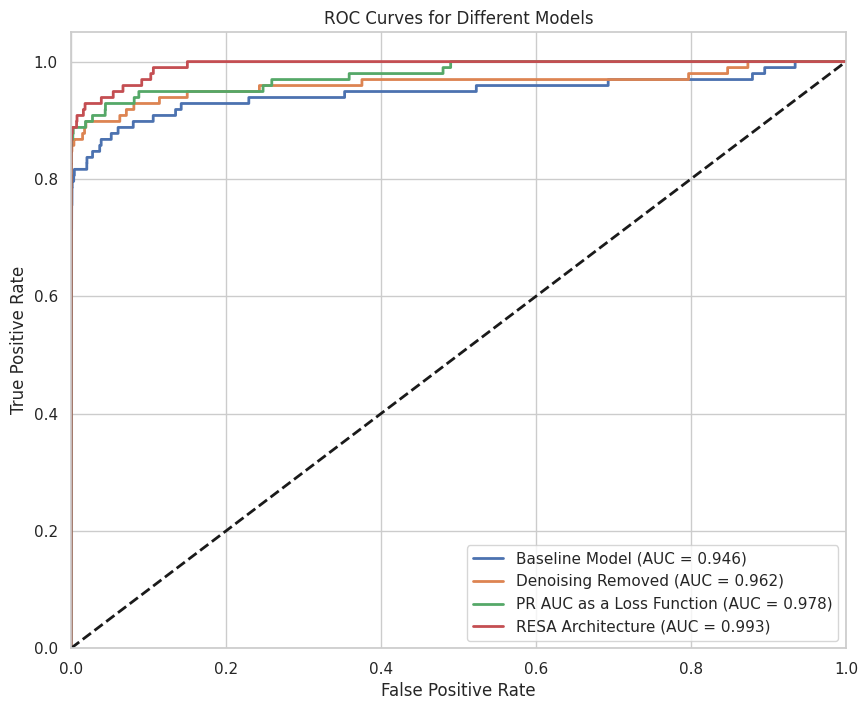

In [66]:
# Assuming baseline_preds, no_noise_preds, pr_auc_preds, and trans_preds are already defined from previous code blocks.
# And y_test is available.

models = {
    'Baseline Model': baseline_preds,
    'Denoising Removed': no_noise_preds,
    'PR AUC as a Loss Function': pr_auc_preds,
    'RESA Architecture': trans_preds
}

plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
